In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos


import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
phish_data = pd.read_csv("phishing_site_urls.csv")

In [3]:
phish_data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.columns

Index(['URL', 'Label'], dtype='object')

In [6]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

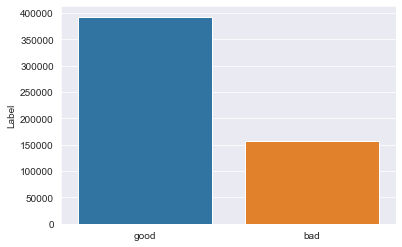

In [7]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [10]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [11]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 5.182986900000001 sec


In [12]:
phish_data.sample(5)

,URL,Label,text_tokenized
192378,genforum.genealogy.com/allard/page3.html,good,"[genforum, genealogy, com, allard, page, html]"
343433,fullmount.co.uk/index.php/mma-news/1-latest-ne...,good,"[fullmount, co, uk, index, php, mma, news, lat..."
249753,travelvisabenin.com/,good,"[travelvisabenin, com]"
25129,banksrape.us/~linkbadg/upload/paypal.com/us/cg...,bad,"[banksrape, us, linkbadg, upload, paypal, com,..."
182808,enchantedserenityperiodfilms.blogspot.com/2010...,good,"[enchantedserenityperiodfilms, blogspot, com, ..."


In [13]:
stemmer = SnowballStemmer("english") # choose a language
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 121.08529979999999 sec


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
165568,dir.yahoo.com/News_and_Media/Radio/By_Region/U...,good,"[dir, yahoo, com, News, and, Media, Radio, By,...","[dir, yahoo, com, news, and, media, radio, by,..."
90913,freespace.virgin.net/chris.lawson/rk/index.htm,good,"[freespace, virgin, net, chris, lawson, rk, in...","[freespac, virgin, net, chris, lawson, rk, ind..."
270587,airsafe.com/,good,"[airsafe, com]","[airsaf, com]"
2023,britneybrooks.com/SecurityMeasure.html,bad,"[britneybrooks, com, SecurityMeasure, html]","[britneybrook, com, securitymeasur, html]"
407583,nydailynews.com/topics/Kansas+City+Royals,good,"[nydailynews, com, topics, Kansas, City, Royals]","[nydailynew, com, topic, kansa, citi, royal]"


In [15]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.44975370000000225 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
399830,myspace.com/lesbreastfeeders65,good,"[myspace, com, lesbreastfeeders]","[myspac, com, lesbreastfeed]",myspac com lesbreastfeed
323895,evri.com/organization/82nd-field-artillery-reg...,good,"[evri, com, organization, nd, field, artillery...","[evri, com, organ, nd, field, artilleri, regim...",evri com organ nd field artilleri regiment x
6290,us.diablo.com.zh-hos.in/login.html?app=wamref=...,bad,"[us, diablo, com, zh, hos, in, login, html, ap...","[us, diablo, com, zh, hos, in, login, html, ap...",us diablo com zh hos in login html app wamref ...
81846,dickey.his.com/diffstat/diffstat.html,good,"[dickey, his, com, diffstat, diffstat, html]","[dickey, his, com, diffstat, diffstat, html]",dickey his com diffstat diffstat html
37802,id0498372885938paypal.com.au.account.verificat...,bad,"[id, paypal, com, au, account, verification, r...","[id, paypal, com, au, account, verif, re, k, c...",id paypal com au account verif re k com au mub...


In [17]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [18]:

bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [19]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [20]:

#create cv object
cv = CountVectorizer()

In [21]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [22]:

feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [24]:

# create lr object
lr = LogisticRegression()

In [25]:
lr.fit(trainX,trainY)

lr.score(testX,testY)

0.9640664933703227

In [26]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9790417199624281
Testing Accuracy : 0.9640664933703227

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.93     36649
        Good       0.99      0.96      0.98    100688

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


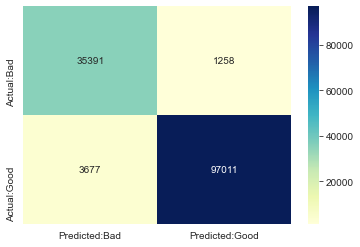

In [27]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [28]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [29]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [30]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [31]:
pipeline_ls.score(testX,testY)

0.966542155427889

Testing Accuracy : 0.966542155427889

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37001
        Good       0.99      0.97      0.98    100336

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


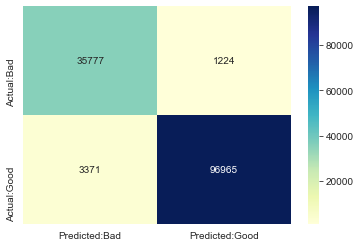

In [32]:
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [33]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

<IPython.core.display.Javascript object>

In [34]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

<IPython.core.display.Javascript object>

0.966542155427889


In [35]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

<IPython.core.display.Javascript object>

['bad' 'good' 'good' 'bad']
******************************
['good' 'good' 'good' 'good']


In [40]:
loaded_model.predict(["	
http://www.abnchina.cn/"])

SyntaxError: EOL while scanning string literal (<ipython-input-40-b339d239c24e>, line 1)

In [43]:
loaded_model.predict(["https://www.youtube.com/watch?v=V1Pl8CzNzCw&list=RDjJPMnTXl63E&index=9"])

array(['good'], dtype=object)